# INTRO

## Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np


## Load Data

In [2]:

data = pd.read_csv('../data/raw/Loan_Default.csv')
data.head(5)

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

## Data Exploration

In [3]:
data.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
data.sample(10)

ID  year loan_limit             Gender approv_in_adv loan_type  \
612      25502  2019         cf  Sex Not Available         nopre     type1   
99085   123975  2019         cf  Sex Not Available         nopre     type2   
108520  133410  2019         cf               Male         nopre     type2   
51193    76083  2019         cf             Female         nopre     type2   
94384   119274  2019         cf              Joint         nopre     type1   
81348   106238  2019         cf  Sex Not Available           pre     type1   
57360    82250  2019         cf  Sex Not Available         nopre     type1   
114871  139761  2019         cf  Sex Not Available         nopre     type1   
142458  167348  2019         cf             Female         nopre     type2   
145069  169959  2019         cf               Male         nopre     type2   

       loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
612              p2                l1        nopc                  nob/c  ...   
99085            p4                l1        nopc                    b/c  ...   
108520           p4                l1        nopc                    b/c  ...   
51193            p1                l1        nopc                    b/c  ...   
94384            p1                l1        nopc                  nob/c  ...   
81348            p3                l1        nopc                  nob/c  ...   
57360            p4                l1        nopc                  nob/c  ...   
114871           p3                l1        nopc                  nob/c  ...   
142458           p3                l1        nopc                    b/c  ...   
145069           p1                l1        nopc                    b/c  ...   

        credit_type  Credit_Score  co-applicant_credit_type    age  \
612            EQUI           816                       EXP  35-44   
99085          CRIF           878                       EXP  55-64   
108520         EQUI           566                       EXP  45-54   
51193           EXP           711                       CIB    <25   
94384           CIB           580                       EXP  55-64   
81348           EXP           510                       CIB  35-44   
57360          CRIF           639                       EXP  65-74   
114871         CRIF           517                       EXP  65-74   
142458          EXP           647                       CIB  55-64   
145069         EQUI           724                       EXP  55-64   

        submission_of_application        LTV Region Security_Type  Status  \
612                       to_inst        NaN  south        direct       1   
99085                     to_inst  78.163580  south        direct       1   
108520                   not_inst        NaN  North        direct       1   
51193                     to_inst  93.154762  North        direct       0   
94384                    not_inst  50.679348  south        direct       1   
81348                     to_inst  60.551948  south        direct       0   
57360                     to_inst  79.522613  south        direct       0   
114871                    to_inst  68.208661  south        direct       0   
142458                    to_inst  53.151260  North        direct       0   
145069                   not_inst        NaN  North        direct       1   

       dtir1  
612      NaN  
99085   53.0  
108520   NaN  
51193   58.0  
94384   44.0  
81348   36.0  
57360   49.0  
114871  44.0  
142458  36.0  
145069   NaN  

[10 rows x 34 columns]

In [6]:
print(data.shape)
print(data.columns)

(148670, 34)
Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [7]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

# EDA

## Data Cleaning: Dropping and Handling Missing Values

### What We Are Doing
1. **Dropping Unnecessary Columns**  
   - Removing columns that are not needed for analysis:  
     `'loan_limit'`, `'rate_of_interest'`, `'Interest_rate_spread'`, `'Upfront_charges'`, `'property_value'`, `'dtir1'`, and `'LTV'`.  
   - This reduces dimensionality and improves efficiency.

2. **Handling Missing Values**  
   - Iterating through all columns in the dataset:
     - If a column has missing values:
       - If it's numerical (`float64` or `int64`), we fill missing values with the **median** to avoid skewing the data.
       - If it's categorical, we fill missing values with the **most frequent value** (mode).
   - This ensures that no missing values remain, preventing errors in analysis or modeling.

3. **Validation**  
   - Printing the count of missing values after imputation to confirm that all missing data has been handled.


In [8]:
# Dropping unnecessary columns
unnecessary_columns = ['loan_limit', 'rate_of_interest', 'Interest_rate_spread', 
                        'Upfront_charges', 'property_value', 'dtir1', 'LTV']
data.drop(unnecessary_columns, axis=1, inplace=True)
data.head()

ID  year             Gender approv_in_adv loan_type loan_purpose  \
0  24890  2019  Sex Not Available         nopre     type1           p1   
1  24891  2019               Male         nopre     type2           p1   
2  24892  2019               Male           pre     type1           p1   
3  24893  2019               Male         nopre     type1           p4   
4  24894  2019              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  ...  \
0                l1        nopc                  nob/c       116500  ...   
1                l1        nopc                    b/c       206500  ...   
2                l1        nopc                  nob/c       406500  ...   
3                l1        nopc                  nob/c       456500  ...   
4                l1        nopc                  nob/c       696500  ...   

   total_units   income credit_type Credit_Score co-applicant_credit_type  \
0           1U   1740.0         EXP          758                      CIB   
1           1U   4980.0        EQUI          552                      EXP   
2           1U   9480.0         EXP          834                      CIB   
3           1U  11880.0         EXP          587                      CIB   
4           1U  10440.0        CRIF          602                      EXP   

     age submission_of_application Region  Security_Type Status  
0  25-34                   to_inst  south         direct      1  
1  55-64                   to_inst  North         direct      1  
2  35-44                   to_inst  south         direct      0  
3  45-54                  not_inst  North         direct      0  
4  25-34                  not_inst  North         direct      0  

[5 rows x 27 columns]

In [9]:
# Handling missing values
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype in ['float64', 'int64']:  
            data[column] = data[column].fillna(data[column].median())  # Explicit assignment
        else:  
            data[column] = data[column].fillna(data[column].mode()[0])  # Explicit assignment

print(data.isnull().sum())

ID                           0
year                         0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
Status                       0
dtype: int64


## Encoding Categorical Variables

### Why?
Machine learning models require numerical inputs. Categorical (dtype = object) variables must be converted to numbers to be processed effectively.

### How?

1. **Label Encoding**  
   - Converts categorical columns (`label_columns`) into numerical values.  
   - Each unique category is assigned an integer.  
   - Suitable for ordinal data but can introduce unintended ordinal relationships for nominal categories.  

2. **One-Hot Encoding (`get_dummies`)**  
   - Applied to `'Region'` to create binary columns for each category.  
   - `drop_first=True` removes one category to prevent multicollinearity.  
   - Ensures categorical data is represented without imposing a false order.  


In [10]:
# Necessery imports for this chapter:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [11]:
# Print the unique values of the categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

Gender: ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv: ['nopre' 'pre']
loan_type: ['type1' 'type2' 'type3']
loan_purpose: ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness: ['l1' 'l2']
open_credit: ['nopc' 'opc']
business_or_commercial: ['nob/c' 'b/c']
Neg_ammortization: ['not_neg' 'neg_amm']
interest_only: ['not_int' 'int_only']
lump_sum_payment: ['not_lpsm' 'lpsm']
construction_type: ['sb' 'mh']
occupancy_type: ['pr' 'sr' 'ir']
Secured_by: ['home' 'land']
total_units: ['1U' '2U' '3U' '4U']
credit_type: ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type: ['CIB' 'EXP']
age: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application: ['to_inst' 'not_inst']
Region: ['south' 'North' 'central' 'North-East']
Security_Type: ['direct' 'Indriect']


In [12]:
# Label Encoding for Binary & Ordinal Categories
label_cols = [
    'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 
    'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 
    'construction_type', 'occupancy_type', 'Secured_by', 'submission_of_application', 'Security_Type'
]
categorical_columns = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# One-Hot Encoding for Nominal Categories
one_hot_cols = ['total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [13]:
data.head()

ID  year  Gender  approv_in_adv  loan_type  loan_purpose  \
0  24890  2019       3              0          0             0   
1  24891  2019       2              0          1             0   
2  24892  2019       2              1          0             0   
3  24893  2019       2              0          0             3   
4  24894  2019       1              1          0             0   

   Credit_Worthiness  open_credit  business_or_commercial  loan_amount  ...  \
0                  0            0                       1       116500  ...   
1                  0            0                       0       206500  ...   
2                  0            0                       1       406500  ...   
3                  0            0                       1       456500  ...   
4                  0            0                       1       696500  ...   

   co-applicant_credit_type_EXP  age_35-44  age_45-54  age_55-64  age_65-74  \
0                         False      False      False      False      False   
1                          True      False      False       True      False   
2                         False       True      False      False      False   
3                         False      False       True      False      False   
4                          True      False      False      False      False   

   age_<25  age_>74  Region_North-East  Region_central  Region_south  
0    False    False              False           False          True  
1    False    False              False           False         False  
2    False    False              False           False          True  
3    False    False              False           False         False  
4    False    False              False           False         False  

[5 rows x 38 columns]

In [13]:
print(categorical_columns)

Index(['Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [14]:
correlation = data.corr()
correlation

ID  year    Gender  approv_in_adv  \
ID                            1.000000   NaN  0.003384      -0.000020   
year                               NaN   NaN       NaN            NaN   
Gender                        0.003384   NaN  1.000000       0.008468   
approv_in_adv                -0.000020   NaN  0.008468       1.000000   
loan_type                     0.000303   NaN  0.064167      -0.004164   
loan_purpose                 -0.000704   NaN  0.038085      -0.146053   
Credit_Worthiness             0.001008   NaN -0.002765      -0.061190   
open_credit                   0.003563   NaN  0.006159      -0.005941   
business_or_commercial       -0.001075   NaN  0.005249      -0.010134   
loan_amount                  -0.000566   NaN -0.065466      -0.029622   
term                         -0.004080   NaN -0.052260       0.024238   
Neg_ammortization             0.001185   NaN -0.008058       0.077195   
interest_only                -0.005592   NaN  0.003444       0.076226   
lump_sum_payment             -0.004468   NaN -0.007587       0.060924   
construction_type            -0.003738   NaN -0.000400       0.001416   
occupancy_type               -0.001331   NaN  0.003324       0.012831   
Secured_by                    0.003738   NaN  0.000400      -0.001416   
income                        0.002260   NaN -0.005785      -0.011544   
Credit_Score                 -0.001036   NaN  0.004345      -0.001227   
submission_of_application    -0.000381   NaN  0.260144       0.079726   
Security_Type                -0.003738   NaN -0.000400       0.001416   
Status                        0.001703   NaN  0.051794      -0.037371   
total_units_2U                0.001176   NaN -0.003093      -0.003349   
total_units_3U                0.000606   NaN -0.006828      -0.005121   
total_units_4U                0.000528   NaN -0.002832      -0.000724   
credit_type_CRIF              0.003237   NaN -0.009618       0.003362   
credit_type_EQUI              0.001338   NaN  0.024590      -0.018393   
credit_type_EXP              -0.001267   NaN  0.010925       0.000354   
co-applicant_credit_type_EXP  0.006056   NaN -0.055773      -0.011787   
age_35-44                    -0.002056   NaN -0.002597       0.002987   
age_45-54                    -0.003749   NaN  0.000994      -0.007152   
age_55-64                     0.003767   NaN  0.006154      -0.006643   
age_65-74                     0.004680   NaN  0.004266      -0.008293   
age_<25                       0.004820   NaN -0.000538       0.014129   
age_>74                      -0.001423   NaN  0.007122      -0.012104   
Region_North-East             0.000544   NaN -0.034646       0.001792   
Region_central               -0.001978   NaN -0.139180      -0.000689   
Region_south                  0.002635   NaN  0.506401      -0.008630   

                              loan_type  loan_purpose  Credit_Worthiness  \
ID                             0.000303     -0.000704           0.001008   
year                                NaN           NaN                NaN   
Gender                         0.064167      0.038085          -0.002765   
approv_in_adv                 -0.004164     -0.146053          -0.061190   
loan_type                      1.000000      0.019610          -0.011153   
loan_purpose                   0.019610      1.000000          -0.040186   
Credit_Worthiness             -0.011153     -0.040186           1.000000   
open_credit                   -0.031869     -0.002452           0.230578   
business_or_commercial        -0.410676      0.055625          -0.002938   
loan_amount                   -0.072201      0.066663          -0.014207   
term                           0.126822     -0.124109          -0.022585   
Neg_ammortization              0.005984      0.067128          -0.058667   
interest_only                  0.011127     -0.020151          -0.049889   
lump_sum_payment              -0.008584     -0.009989           0.031056   
construction_type             -0.006152      0.0

In [ ]:
# sns.pairplot(data, diag_kind='kde')

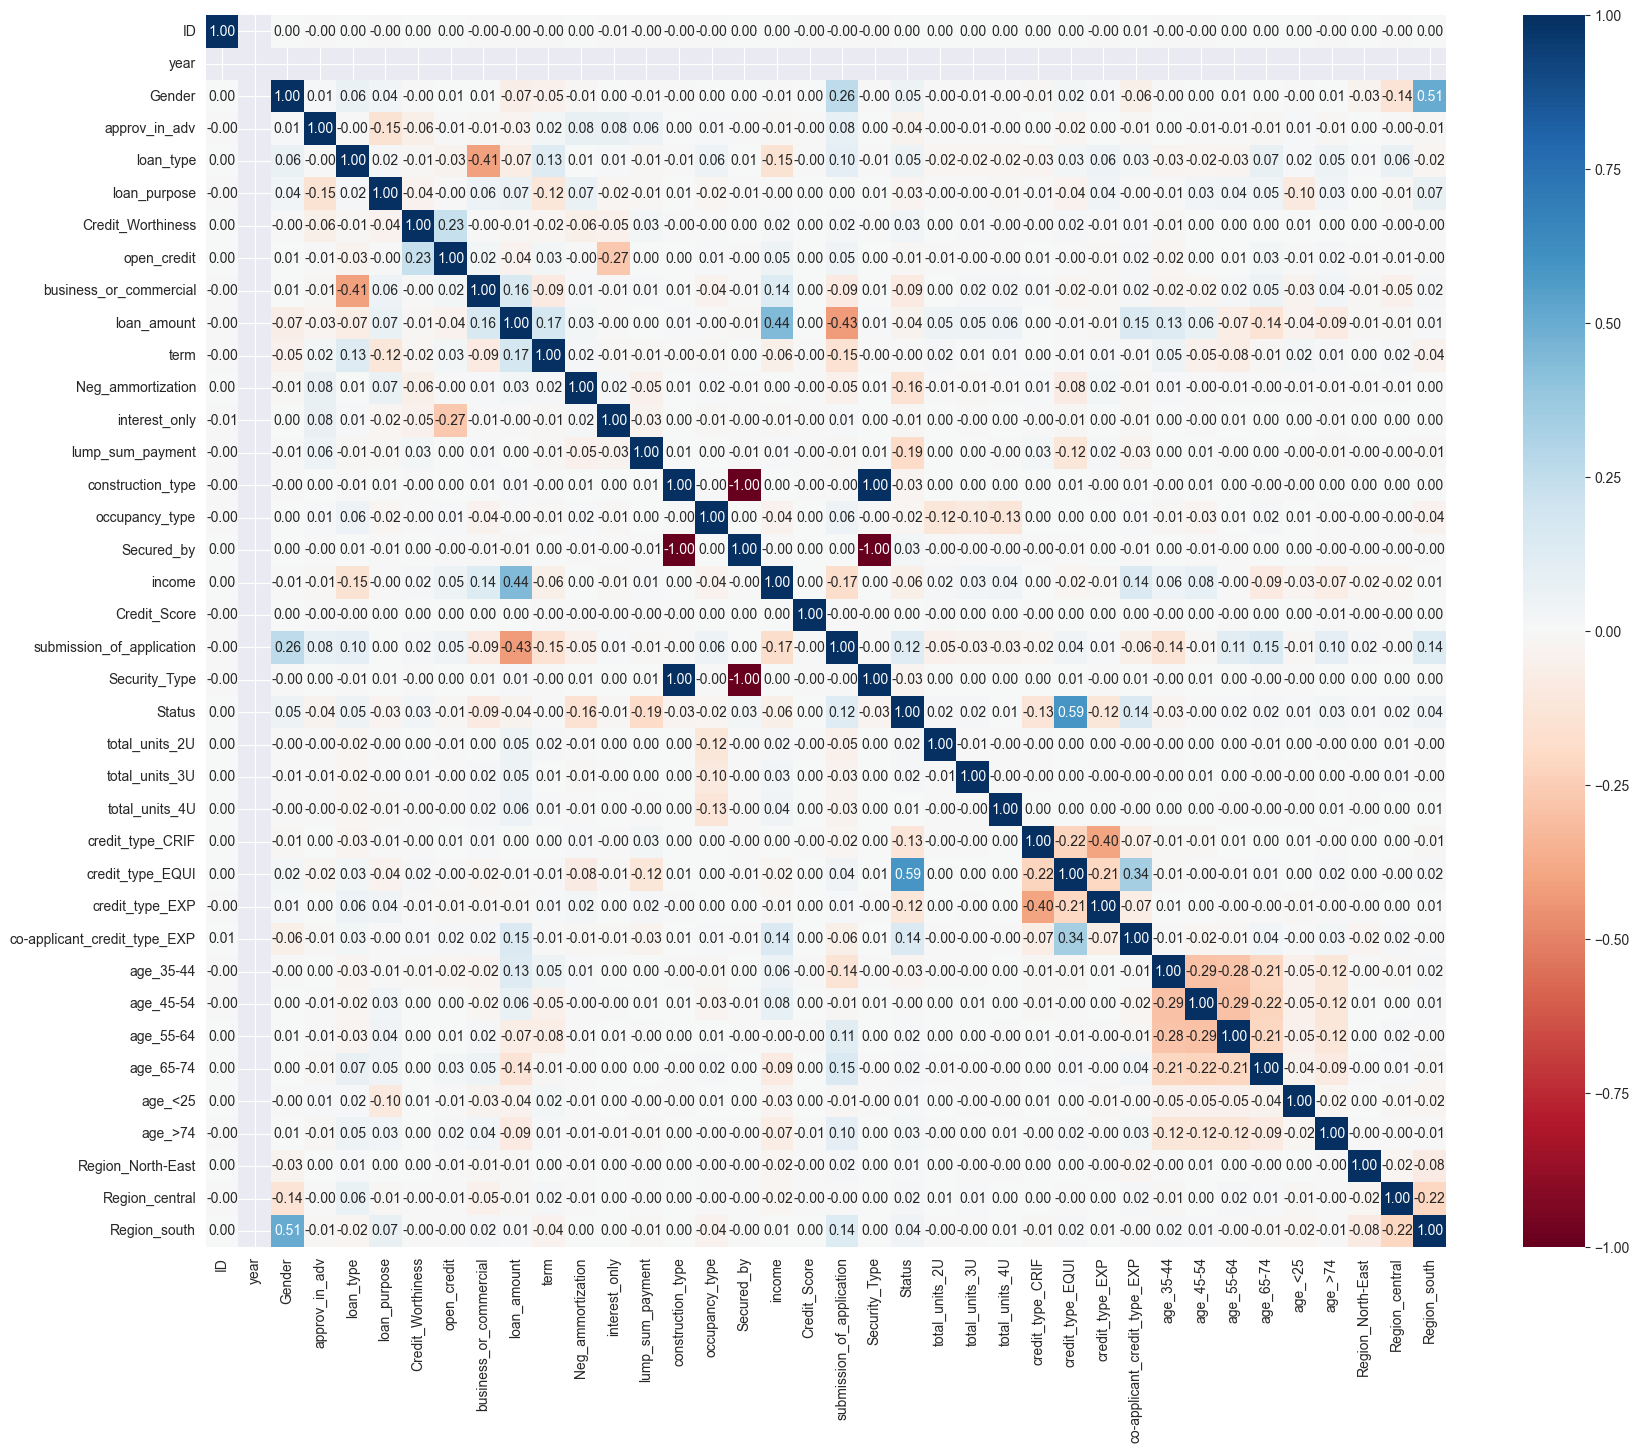

In [14]:
# Lets find correlation between features
correlation = data.corr()
correlation


plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='RdBu', fmt='.2f', cbar=True)
plt.show()


In [15]:
# Encoding categorical variables
column_labels = data.columns 

In [16]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)
# data['Region'].value_counts()


KeyError: "None of [Index(['Region'], dtype='object')] are in the [columns]"